#  Prevendo vendas a partir do investimento em Marketing


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("MKT.csv")
dados.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


### Verificando os tipos de dados e possiveis valores nulos

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


### Dados estatisticos

In [4]:
dados.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### Verificando possiveis dados duplicados

In [5]:
dados.duplicated().sum()

0

In [6]:
import warnings
warnings.filterwarnings('ignore')

# **Estudando as variaveis**

### Dados estatisticos, possiveis outliers e destribuição

## **Youtube**

In [7]:
# Dados estatisticos e possiveis outliers
dados["youtube"].describe()

count    171.000000
mean     178.021053
std      102.449597
min        0.840000
25%       91.080000
50%      179.760000
75%      262.980000
max      355.680000
Name: youtube, dtype: float64

### Visualizando a distribuição dos dados

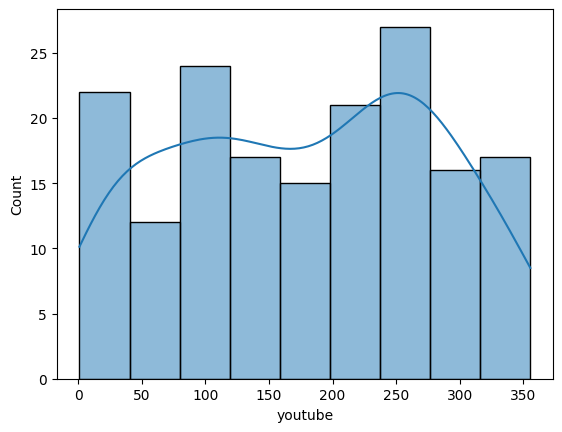

In [8]:
sns.histplot(data=dados, x="youtube", kde=True)
plt.show()

## Facebook

In [9]:
# Dados estatisticos e possiveis outliers
dados["facebook"].describe()

count    171.000000
mean      27.671579
std       17.913532
min        0.000000
25%       11.700000
50%       26.760000
75%       43.680000
max       59.520000
Name: facebook, dtype: float64

### Visualizando a distribuição dos dados

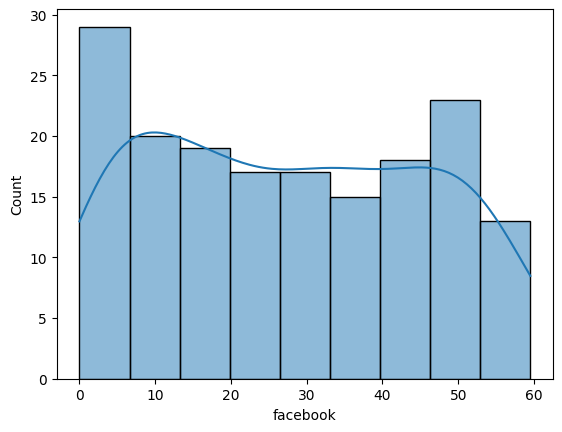

In [10]:
sns.histplot(data=dados, x="facebook", kde=True)
plt.show()

## Newspaper

In [11]:
# Dados estatisticos e possiveis outliers
dados["newspaper"].describe()

count    171.000000
mean      35.240000
std       24.902918
min        0.360000
25%       13.740000
50%       31.080000
75%       50.880000
max      121.080000
Name: newspaper, dtype: float64

### Visualizando a distribuição dos dados

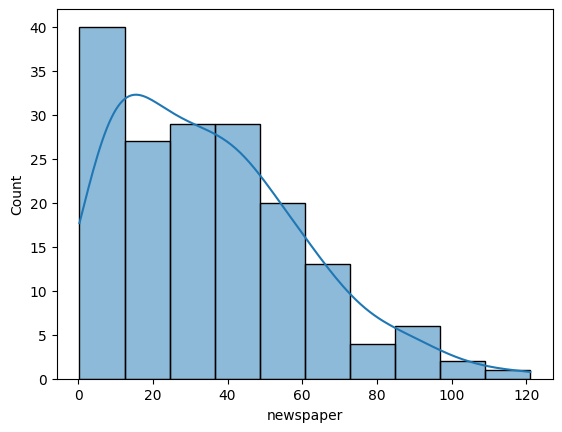

In [12]:
sns.histplot(data=dados, x="newspaper", kde=True)
plt.show()

## Dispersão entre as variaveis

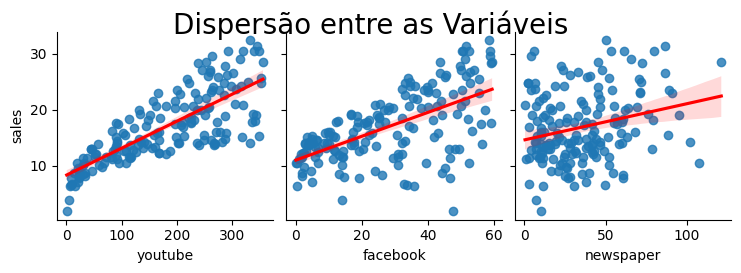

In [13]:
ax = sns.pairplot(dados, y_vars='sales', x_vars=['youtube', 'facebook', 'newspaper'],  kind='reg',plot_kws={'line_kws': {'color': 'r'}})
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Analisando possiveis relações: 
### Investimentos nas redes sociais X valor das vendas

### Youtube

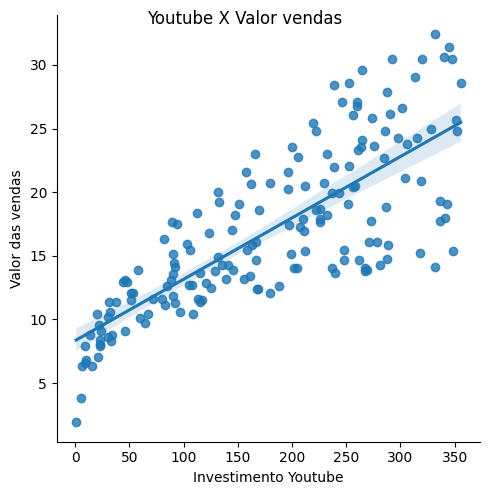

In [14]:
ax = sns.lmplot(x="youtube", y="sales", data=dados)
ax.fig.suptitle('Youtube X Valor vendas')
ax.set_xlabels("Investimento Youtube")
ax.set_ylabels("Valor das vendas")
ax

### Facebook

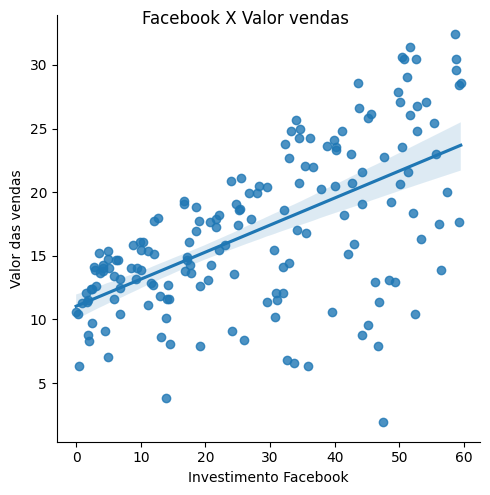

In [15]:
ax = sns.lmplot(x="facebook", y="sales", data=dados)
ax.fig.suptitle('Facebook X Valor vendas')
ax.set_xlabels("Investimento Facebook")
ax.set_ylabels("Valor das vendas")
ax

### Newspaper

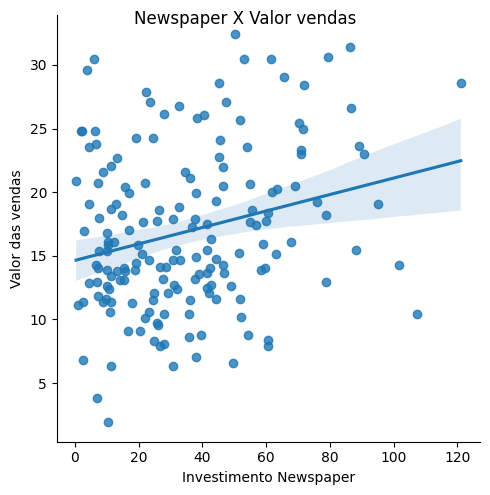

In [16]:
ax = sns.lmplot(x="newspaper", y="sales", data=dados)
ax.fig.suptitle('Newspaper X Valor vendas')
ax.set_xlabels("Investimento Newspaper")
ax.set_ylabels("Valor das vendas")
ax

## Analisando correlação entre as variaveis

In [17]:
matriz_correlacao = dados.corr()
matriz_correlacao

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


### Visualizando graficamente

<Axes: >

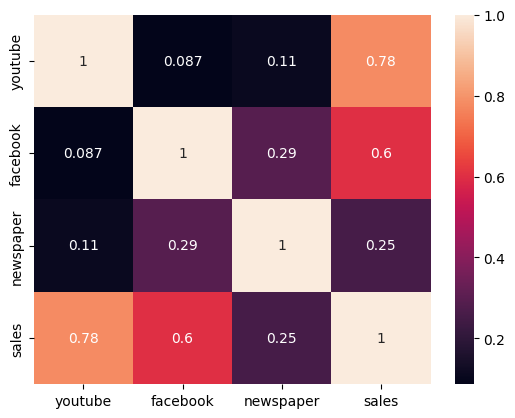

In [18]:
sns.heatmap(matriz_correlacao, annot = True)

### Identificamos assim, uma correlação entre os investimentos nas plataformas e o valor das vendas
#### Sendo possivel, por exemplo, identificar em qual plataforma o investimento tem mais retorno

# Realizando a regressão

In [19]:
from sklearn.linear_model import LinearRegression

### Separando as variaveis

In [20]:
X = dados.drop("sales", axis = 1)
y = dados["sales"]

### Treino e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### Instanciando e fazendo fit do modelo

In [23]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação

In [24]:
modelo.score(X_train, y_train)

0.906871219679218

### Realizando previsao

In [25]:
y_previsto = modelo.predict(X_test)

## Criando um simulador simples para obter previsão

In [26]:
youtube = 80
facebook = 20
newspaper = 10

entrada=[[youtube, facebook, newspaper]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]));

$ 10.79


## Obtendo métricas para o modelo

In [27]:
import numpy as np
from sklearn import metrics

In [28]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2],  ['Erro quadrático medio', 'Erro médio absoluto', 'R²'], columns=['Métricas'])

,Métricas
Erro quadrático medio,4.24
Erro médio absoluto,2.06
R²,0.88
